In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
import seaborn as sns
import plotly.express as px

In [3]:
dataset_cols = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]
df = pd.read_csv("BostonHousing.csv")
df.columns = dataset_cols
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


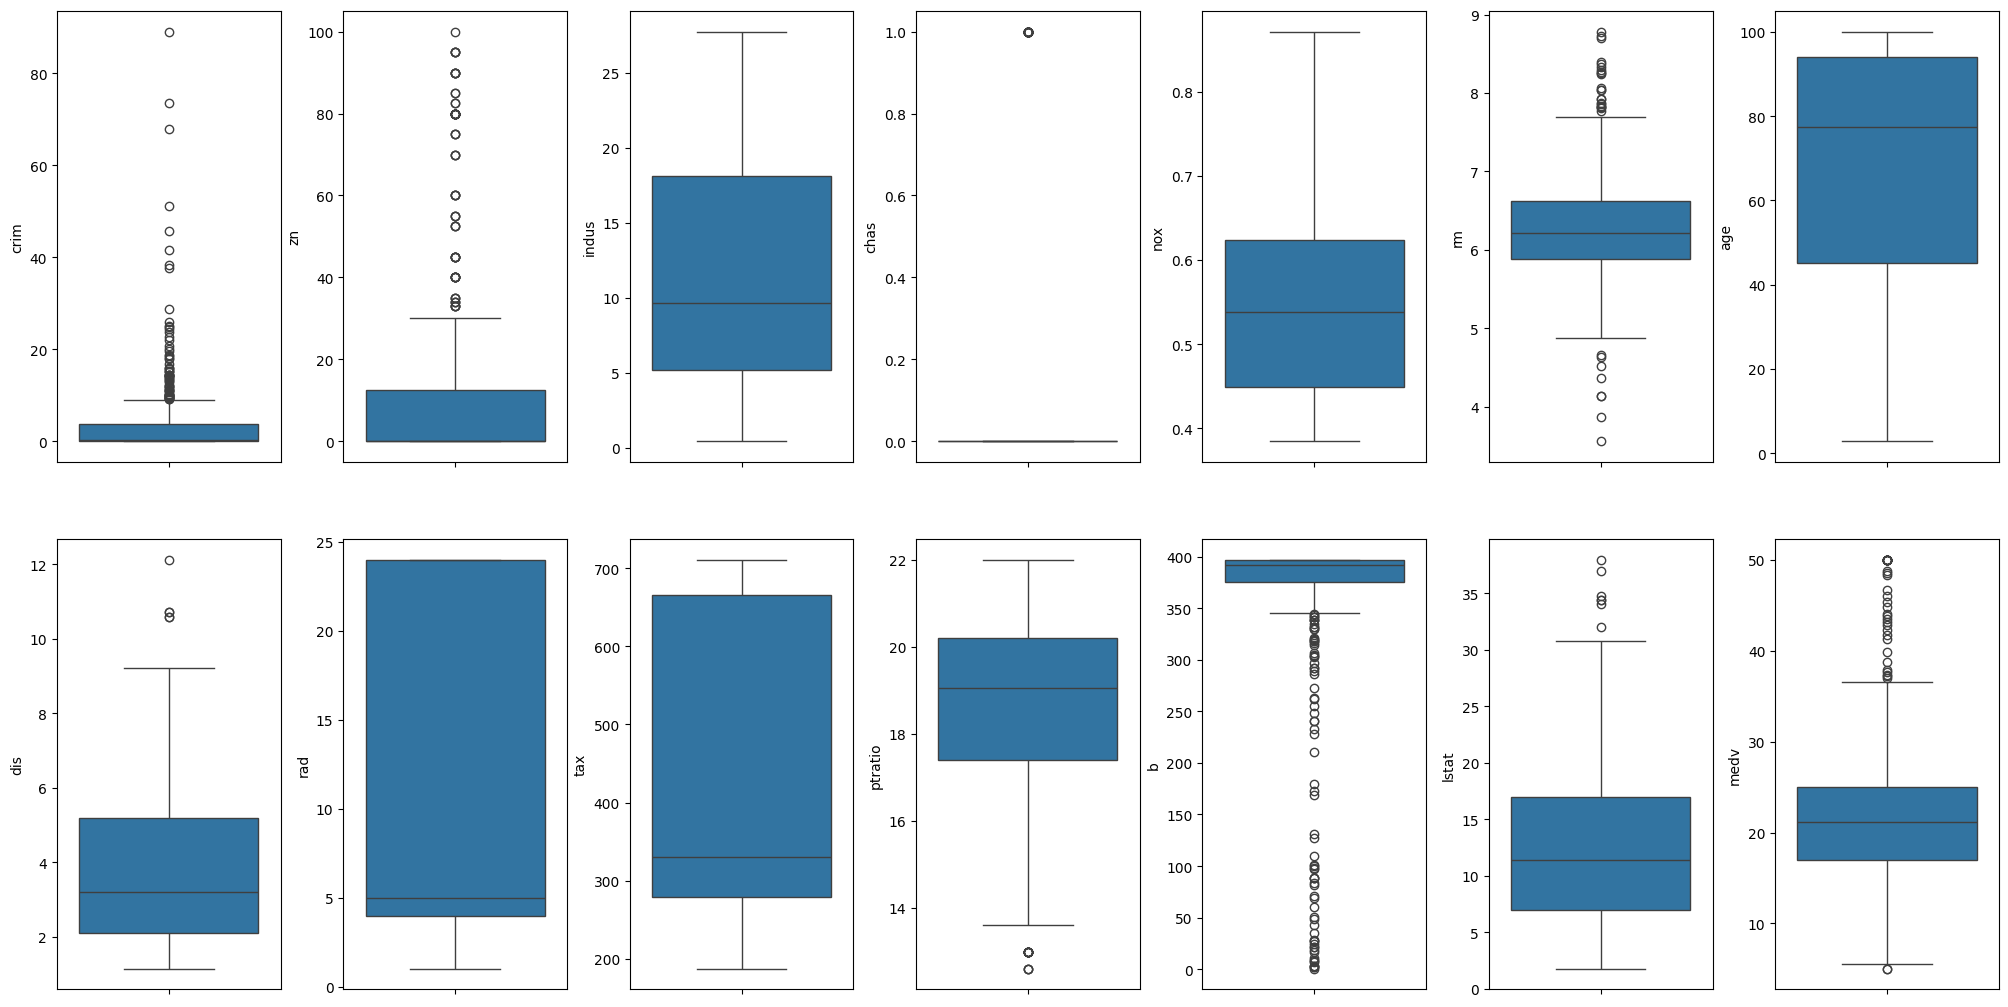

In [6]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [7]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column b outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


In [8]:
columns_to_drop = ['chas']
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
columns_to_process = [
      'medv','crim','zn', 'rm',
    'dis',  'ptratio','b','lstat','medv']

for column in columns_to_process:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    perc_outliers = len(outliers) * 100.0 / len(df[column])

    print(f"Column '{column}' outliers = {perc_outliers:.2f}%")
    print(f"Number of outliers in '{column}':", len(outliers))
    print(f"Lower bound for '{column}': {lower_bound}, Upper bound for '{column}': {upper_bound}")
    print('')

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Column 'medv' outliers = 7.91%
Number of outliers in 'medv': 40
Lower bound for 'medv': 5.0624999999999964, Upper bound for 'medv': 36.962500000000006

Column 'crim' outliers = 13.30%
Number of outliers in 'crim': 62
Lower bound for 'crim': -5.426315, Upper bound for 'crim': 9.264544999999998

Column 'zn' outliers = 9.41%
Number of outliers in 'zn': 38
Lower bound for 'zn': -30.0, Upper bound for 'zn': 50.0

Column 'rm' outliers = 4.10%
Number of outliers in 'rm': 15
Lower bound for 'rm': 5.016874999999999, Upper bound for 'rm': 7.321875000000002

Column 'dis' outliers = 0.57%
Number of outliers in 'dis': 2
Lower bound for 'dis': -1.478650000000001, Upper bound for 'dis': 8.83455

Column 'ptratio' outliers = 1.43%
Number of outliers in 'ptratio': 5
Lower bound for 'ptratio': 13.199999999999998, Upper bound for 'ptratio': 24.4

Column 'b' outliers = 13.66%
Number of outliers in 'b': 47
Lower bound for 'b': 350.75749999999994, Upper bound for 'b': 423.63750000000005

Column 'lstat' outli

In [ ]:
for k, v in df.items():

        print("Column %s outliers = %.2f%%" % (k, perc))q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]

Column crim outliers = 13.27%
Column zn outliers = 13.27%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 4.69%
Column age outliers = 0.00%
Column dis outliers = 1.02%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.65%
Column b outliers = 15.92%
Column lstat outliers = 1.43%
Column medv outliers = 4.49%


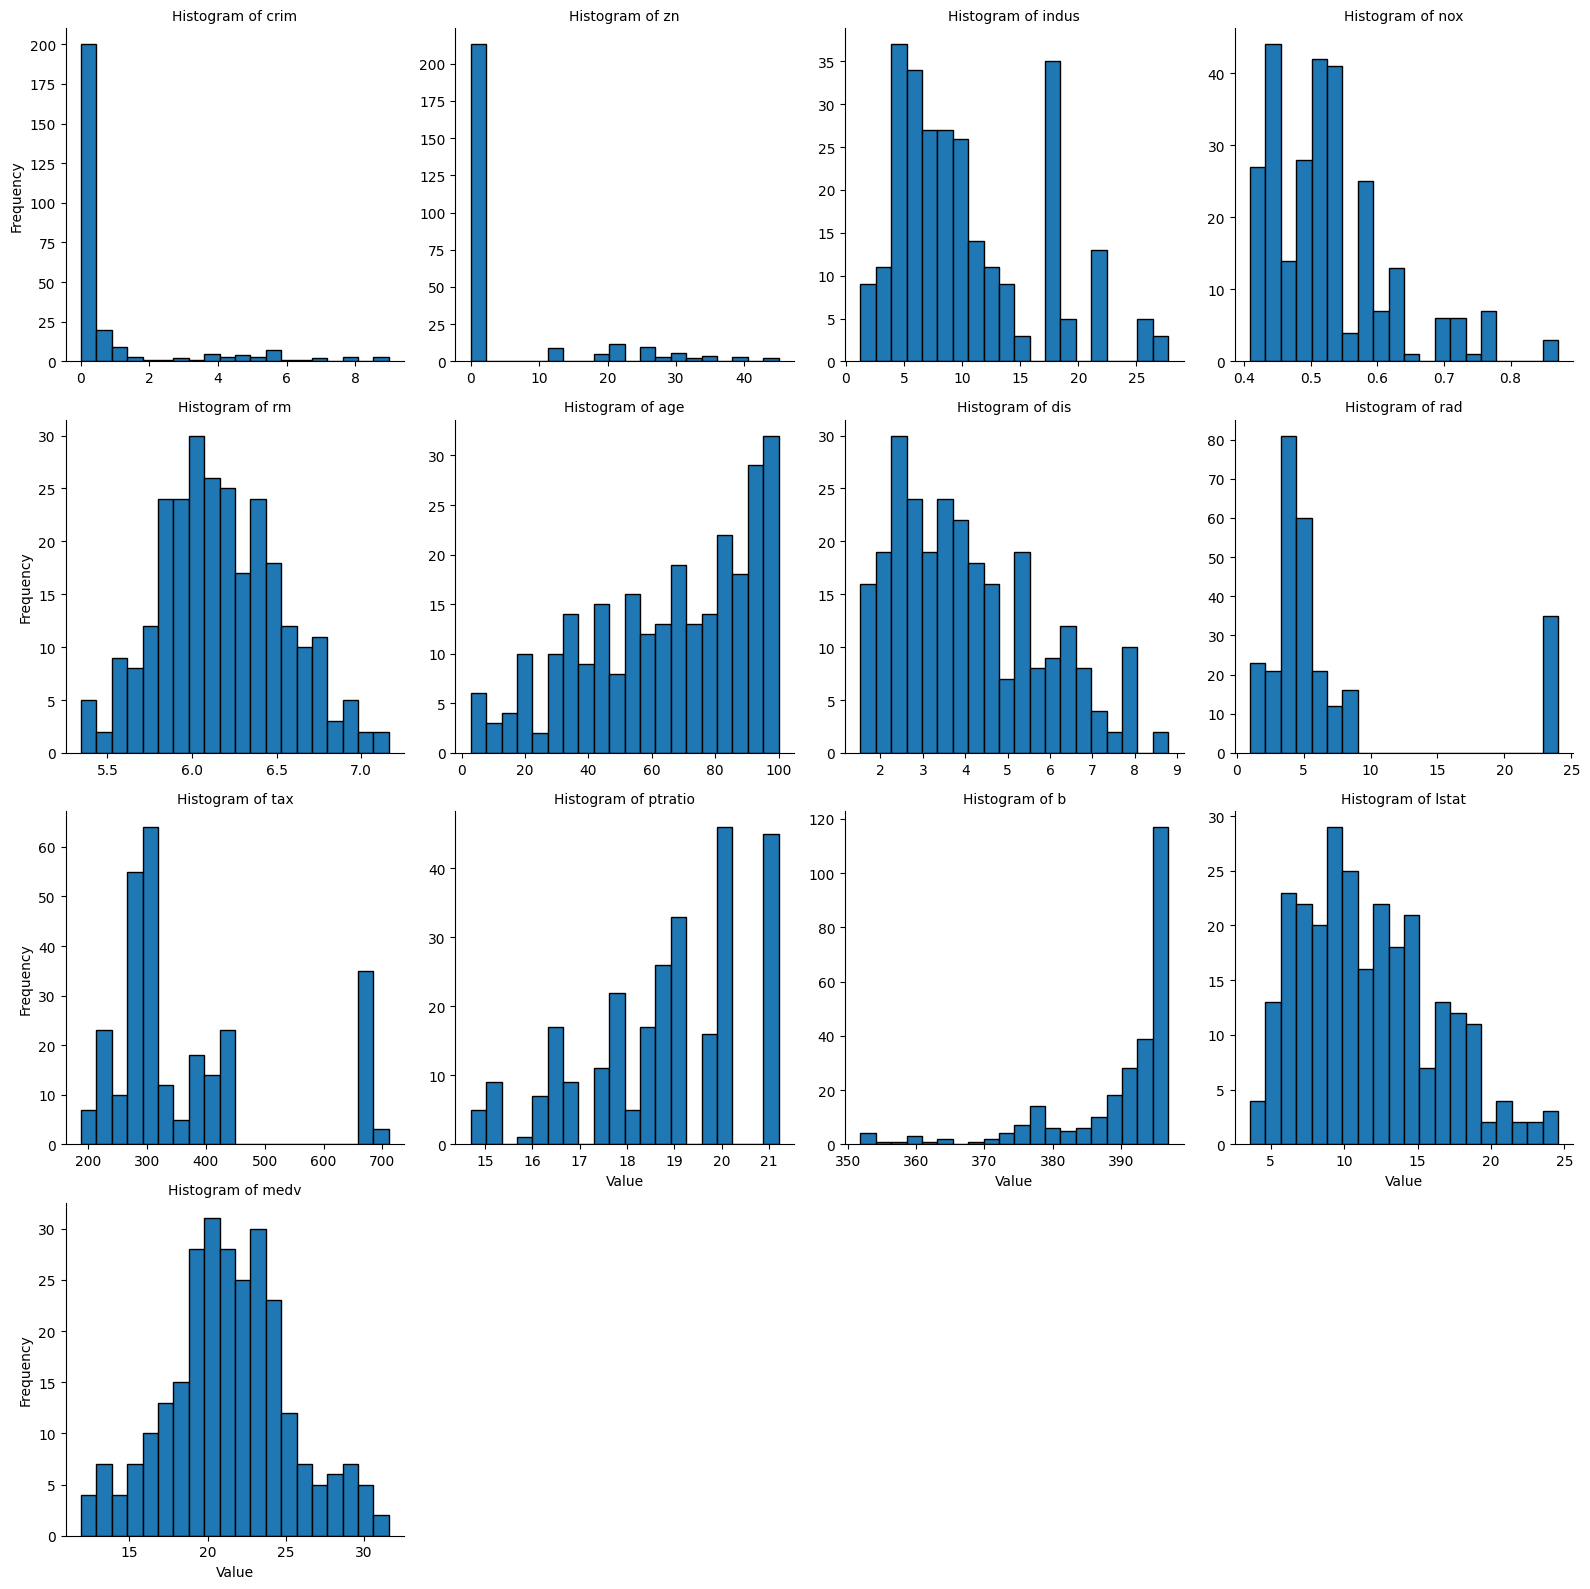

In [11]:
grid = sns.FacetGrid(df.melt(var_name='Column'), col='Column', col_wrap=4, sharex=False, sharey=False, height=4)

# Map histograms to each subplot
grid.map(plt.hist, 'value', bins=20, edgecolor='black')

# Set labels and titles
grid.set_axis_labels('Value', 'Frequency')
grid.set_titles('Histogram of {col_name}')

plt.tight_layout()
plt.show()

<Axes: >

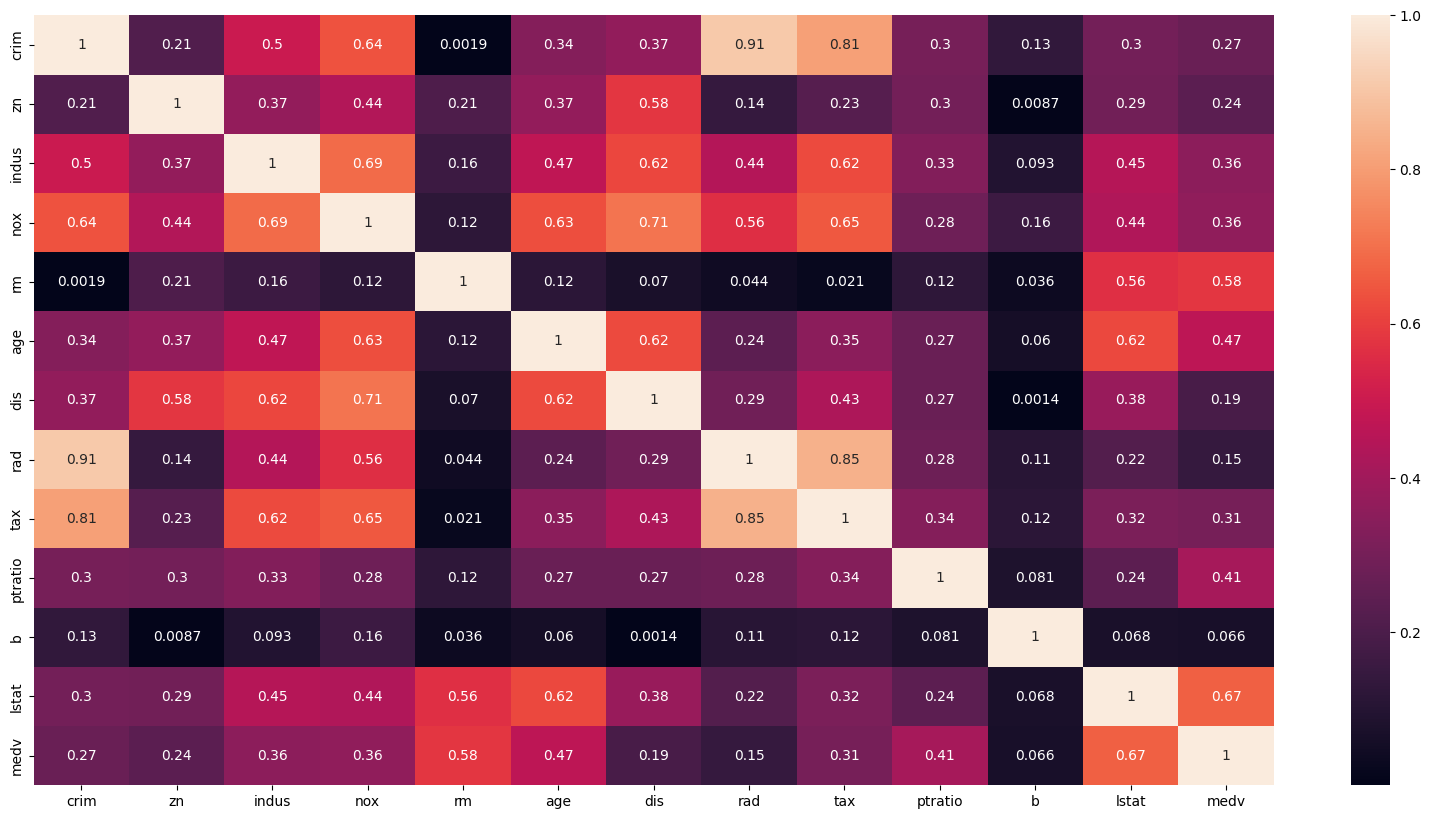

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot = True)

In [14]:
for label in df.columns[:-1]:
  if label != "chas":
    fig = px.scatter(df, x=label, y="medv", trendline="ols", title= label)
    fig.show()

In [18]:
df.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


In [19]:
x = df.iloc[:,:-1].values
y = df.iloc[:,12].values

In [ ]:
#y =  np.log1p(y)
#x = pd.DataFrame(x)
#for col in x.columns:
    #if np.abs(x[col].skew()) > 0.3:
        #x[col] = np.log1p(x[col])
##for col_index in range(x.shape[1]):
   ## col = x[:, col_index]
    ##if np.abs(pd.Series(col).skew()) > 0.3:
   ##     x[:, col_index] = np.log1p(col)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [22]:
ss = StandardScaler()
ss.fit(x_train)

StandardScaler()

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(x_test)
#y_original = np.expm1(y_pred)
#y_original
y+
_pred

array([27.41409607, 23.80773732, 23.47835312, 26.85669416, 22.83967342,
       24.50203849, 21.9337183 , 18.77358903, 23.54412142, 19.85996736,
       26.45920509, 23.03744842, 19.5232209 , 17.68568765, 23.12167097,
       22.72383199, 22.31660536, 20.46345752, 18.38504654, 21.62906371,
       20.95427206, 20.99211267, 22.93616715, 22.58351549, 24.63004072,
       19.323699  , 20.34715815, 23.50872903, 19.28386176, 17.20239107,
       16.48337151, 23.08159623, 26.90873367, 19.84303136, 24.84147708,
       20.45006558, 23.19729088, 21.70738839, 24.94879806, 20.4070307 ,
       15.19181266, 20.07866703, 24.48383202, 16.51469922, 21.88822161,
       20.36205662, 19.87745431, 24.72209789, 21.45548056, 19.59737411,
       13.93742402, 26.57677307, 18.72032076, 24.32173541, 23.43604392,
       22.5984875 , 27.36675909, 21.36289284, 21.88736601, 22.67610885,
       17.50156572, 23.06520721, 28.45703535, 18.83962787, 12.43126135,
       25.03540599, 26.05780601, 20.04604854])

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

R² score: 0.7500522139440055


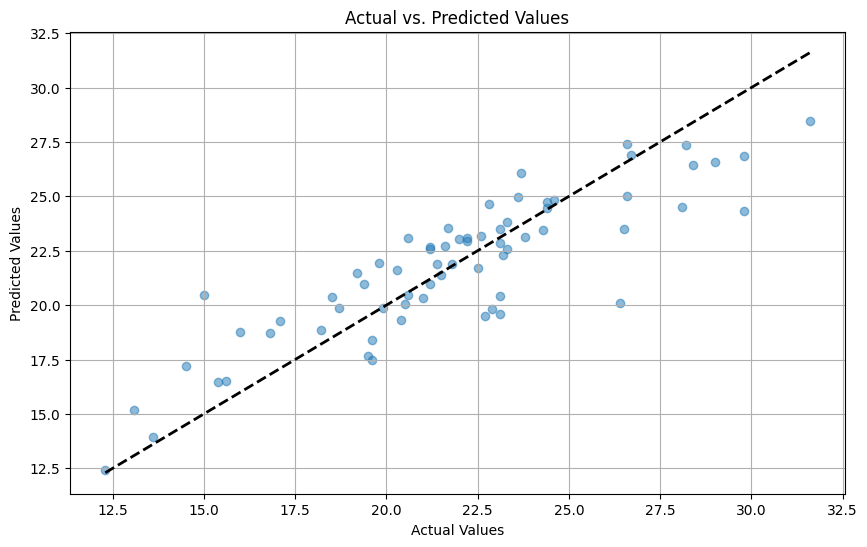

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# Plotting the identity line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

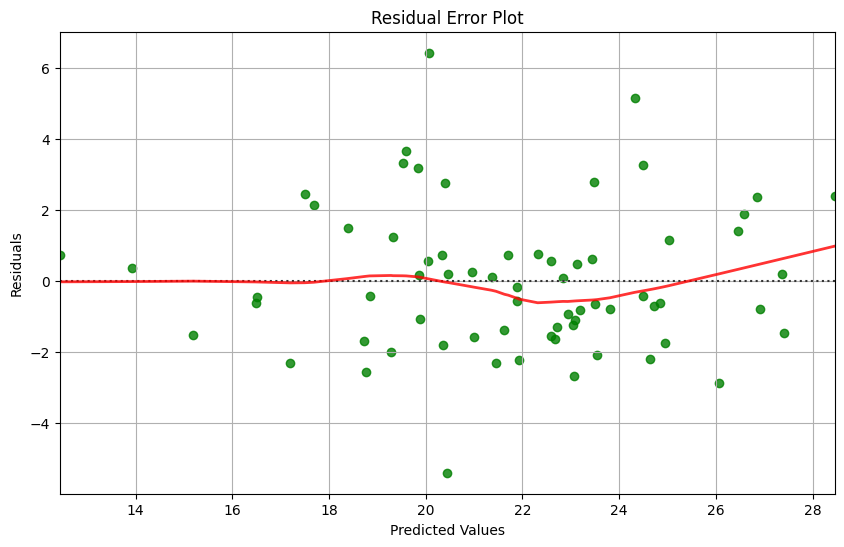

In [27]:
residuals = y_test - y_pred

# Creating the residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g",
              line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Error Plot')
plt.grid(True)
plt.show()